In [1]:
import soundfile as sf
from scipy import signal
#read .wav file
input_signal,fs = sf.read('filter_codes_Sound_Noise.wav')
#sampling frequency of Input signal
sampl_freq=fs
#order of the filter
order=4
#cutoff frquency 4kHz
cutoff_freq=4000.0
#digital frequency
Wn=2*cutoff_freq/sampl_freq
# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order,Wn, 'low')
#filter the input signal with butterworth filter
output_signal = signal.filtfilt(b, a,input_signal)
#output signal = signal.lfilter(b, a, input signal)
#write the output signal into .wav file
sf.write('Sound With ReducedNoise.wav', output_signal, fs)

[ 1.00000000e+00  1.50000000e+00  3.25000000e+00  4.37500000e+00
  2.81250000e+00  3.59375000e+00  2.03125000e-01  8.98437500e-01
 -4.49218750e-01  2.24609375e-01 -1.12304688e-01  5.61523438e-02
 -2.80761719e-02  1.40380859e-02 -7.01904297e-03  3.50952148e-03
 -1.75476074e-03  8.77380371e-04 -4.38690186e-04  0.00000000e+00]


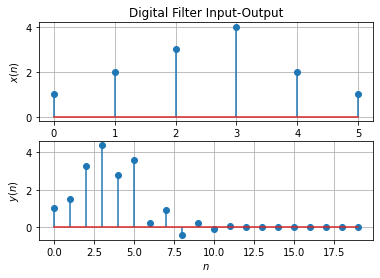

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1.0,2.0,3.0,4.0,2.0,1.0])
k = 20
y = np.zeros(20)


y[0] = x[0]
y[1] = -0.5*y[0]+x[1]

for n in range(2,k-1):
	if n < 6:
		y[n] = -0.5*y[n-1]+x[n]+x[n-2]
	elif n > 5 and n < 8:
		y[n] = -0.5*y[n-1]+x[n-2]
	else:
		y[n] = -0.5*y[n-1]
print(y)

#subplots
plt.subplot(2, 1, 1)
plt.stem(range(0,6),x)
plt.title('Digital Filter Input-Output')
plt.ylabel('$x(n)$')
plt.grid()# minor


plt.subplot(2, 1, 2)
plt.stem(range(0,k),y)
plt.xlabel('$n$')
plt.ylabel('$y(n)$')
plt.grid()# minor



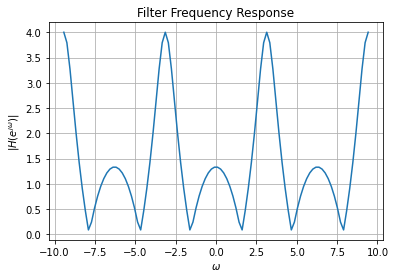

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#DTFT
def H(z):
	num = np.polyval([1,0,1],z**(-1))
	den = np.polyval([0.5,1],z**(-1))
	H = num/den
	return H
		


#Input and Output
omega = np.linspace(-3*np.pi,3*np.pi,100)

#subplots
plt.plot(omega, abs(H(np.exp(1j*omega))))
plt.title('Filter Frequency Response')
plt.xlabel('$\omega$')
plt.ylabel('$|H(e^{\jmath\omega})| $')
plt.grid()# minor





